
# **Importing libraries**


In [1]:


import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt



# **Reading in Images**

In [2]:
img_cv2 = cv2.imread('/content/tem_image.jpg', cv2.IMREAD_GRAYSCALE)

# **Displaying Image**

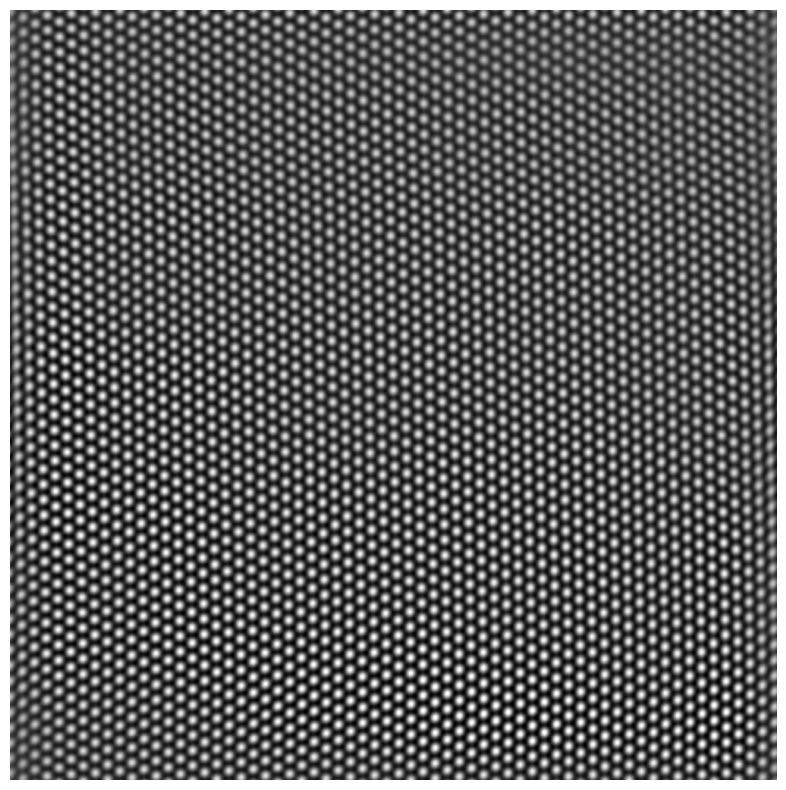

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_cv2, cmap='gray')
ax.axis('off')
plt.show()

# **Extracting Information**

In [4]:
img_cv2

array([[147, 146, 142, ..., 126, 118, 110],
       [153, 151, 146, ..., 114, 107,  99],
       [157, 154, 148, ...,  99,  93,  87],
       ...,
       [ 96,  93,  86, ...,  95,  94,  94],
       [ 85,  82,  77, ..., 110, 110, 109],
       [ 78,  76,  71, ..., 123, 122, 120]], dtype=uint8)

Size of Image

In [5]:
img_shape = img_cv2.shape

In [6]:
img_shape

(1016, 1011)

Rows and Columns of the image

In [7]:
row = img_shape[0]
column = img_shape[1]

print("Rows : ", row)
print("Columns : ", column)

Rows :  1016
Columns :  1011


Number of pixels

In [8]:
print("Number of Pixels : ", row*column)


Number of Pixels :  1027176


Max and min value and Pixel Number

In [9]:
max_intensity = img_cv2.max()
min_intensity = img_cv2.min()

print("Max value of intensity : ", max_intensity)
print("Min value of intensity : ", min_intensity)

Max value of intensity :  255
Min value of intensity :  0


In [10]:
# Count the number of pixels with the maximum and minimum intensities
pixel_count_max = (img_cv2 == max_intensity).sum()
pixel_count_min = (img_cv2 == min_intensity).sum()

print("Number of pixels with max intensity:", pixel_count_max)
print("Number of pixels with min intensity:", pixel_count_min)

Number of pixels with max intensity: 670
Number of pixels with min intensity: 1203


Average intensity of pixels

In [11]:
average_intensity = np.mean(img_cv2)

print("Average intensity of pixels:", average_intensity)


Average intensity of pixels: 87.70379759651705


Distribution of pixels

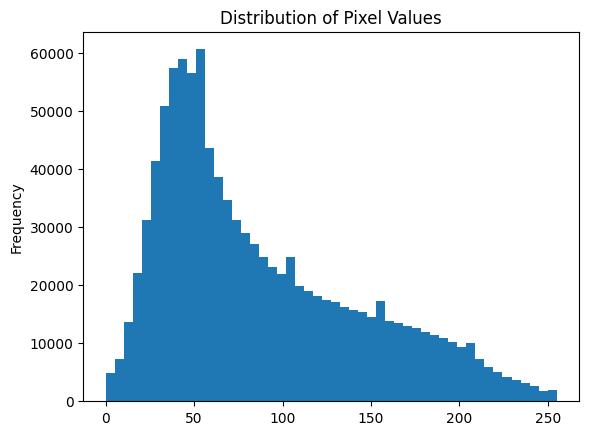

In [12]:
pd.Series(img_cv2.flatten()).plot(kind='hist',bins=50,title='Distribution of Pixel Values')
plt.show()



Number of atoms in the image


In [13]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(
    img_cv2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Find contours in the binary image
contours, _ = cv2.findContours(
    binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (adjust min_area_threshold as needed)
min_area_threshold = 10
filtered_contours = [contour for contour in contours if cv2.contourArea(
    contour) > min_area_threshold]

# Count the number of atoms
num_atoms = len(filtered_contours)

print(f"Number of atoms: {num_atoms}")

Number of atoms: 3204


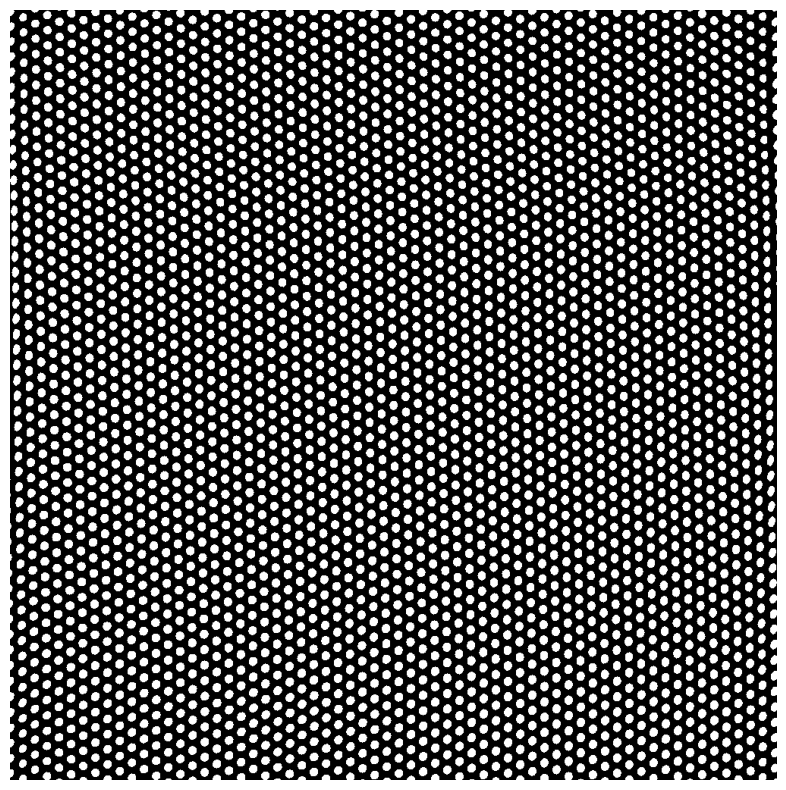

In [14]:


fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(binary_image, cmap='gray')
ax.axis('off')
plt.show()

